In [211]:
import pandas as pd
import numpy as np
import matplotlib as mpl
import matplotlib.pyplot as plt
import seaborn as sns

from sklearn.metrics import confusion_matrix, accuracy_score
from sklearn.model_selection import train_test_split


%matplotlib inline
plt.style.use('seaborn-darkgrid')
sns.set_context("talk")

In [56]:
df = pd.read_csv("data/red_blood_cells.csv")

In [57]:
df['Area_cualitativa'] = df['Area'].apply(lambda x: 'High' if x>40000 else 'Low')
df.head()

,etiquetas,Area,Eccentricity,Solidity,Extent,Perimeter,MajorAxisLength,MinorAxisLength,Circularity,Elongation,...,Skewness_G,Skewness_R,Skewness_B,Kurtosis_G,Kurtosis_R,Kurtosis_B,Entropy_G,Entropy_R,Entropy_B,Area_cualitativa
0,Drepanocits,49102,0.896437,0.989860,0.766452,881.706,376.511849,166.858839,0.793709,0.556830,...,0.535646,0.311529,0.466719,2.398121,2.554637,2.439342,5.566492,5.399148,5.664947,High
1,Drepanocits,47888,0.854299,0.991634,0.725851,838.126,342.854428,178.209424,0.856679,0.480218,...,0.748066,0.410346,0.466982,2.809056,2.907058,2.306805,5.599119,5.313861,5.723647,High
2,Drepanocits,38226,0.965385,0.979175,0.545229,936.704,435.079969,113.481275,0.547475,0.739171,...,0.409211,0.109100,0.363423,2.541581,3.187655,2.478097,5.181426,4.945348,5.278194,Low
3,Drepanocits,50034,0.918789,0.985833,0.580003,922.594,402.348475,158.826855,0.738676,0.605251,...,0.626059,0.260490,0.461162,2.945679,3.238612,2.647657,5.425858,5.233146,5.468556,High
4,Drepanocits,62347,0.897567,0.987800,0.780811,1009.373,427.053434,188.278760,0.768992,0.559121,...,0.649934,0.307376,0.345147,3.063079,2.783532,2.471924,5.776544,5.503361,5.643279,High


In [58]:
df2 = df.loc[df['etiquetas']!='Drepanocits'].reset_index(drop=True)
df2['etiquetas2'] = df2.etiquetas.factorize()[0] # Esferocito es 0
df2['Area_cualitativa2'] = df2.Area_cualitativa.factorize()[0] # Low es 0

df2.etiquetas.value_counts()

Esferocito    552
Normal        552
Name: etiquetas, dtype: int64

Usaremos los descriptores de `MajorAxisLength` y `Mean_Green`

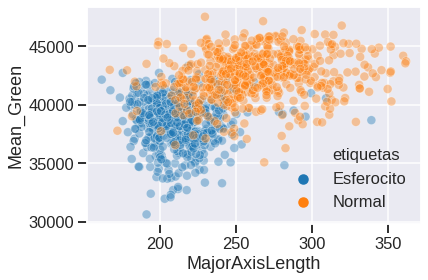

In [9]:
sns.scatterplot(x='MajorAxisLength', y='Mean_Green',hue='etiquetas', data=df2,alpha=0.4);

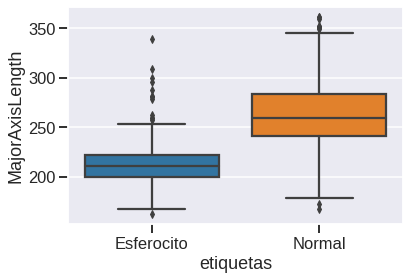

In [12]:
sns.boxplot(y='MajorAxisLength', x='etiquetas',data=df2);

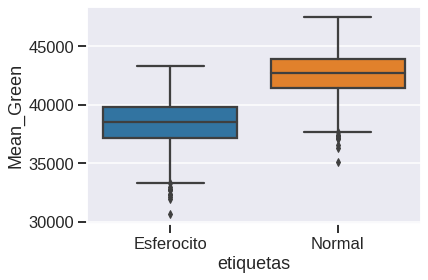

In [14]:
sns.boxplot(y='Mean_Green', x='etiquetas',data=df2);

## ¿Por qué no usar regresión lineal?
El modelo de regresión lineal por defecto, no es ideal y
podría hacerse mejor simplemente haciendo que todas
las probabilidades<0 sean igual a 0 y todas las
probabilidades> 1 igual a 1

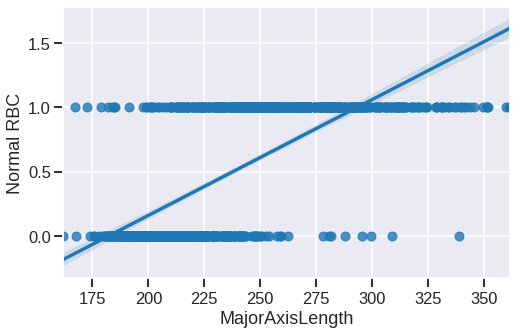

In [23]:
plt.figure(figsize=(8,5))
sns.regplot('MajorAxisLength', 'etiquetas2', data=df2)
plt.ylabel('Normal RBC')
plt.show()

# Regresión Logística

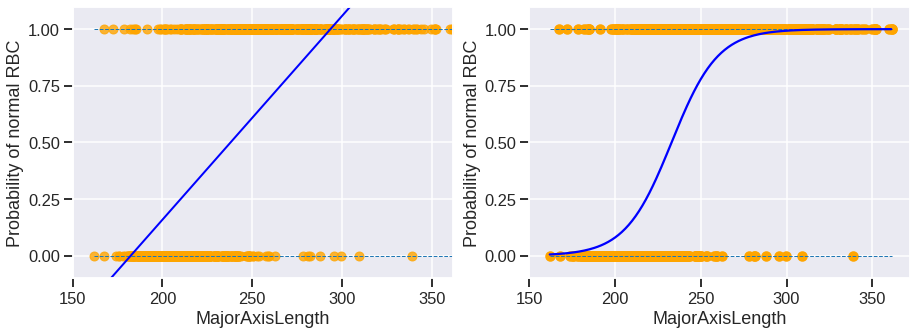

In [141]:
from sklearn.linear_model import LogisticRegression

X_train = df2['MajorAxisLength'].values.reshape(-1,1) 
y = df2['etiquetas2']

# Crea un array para el conjunto de test. Calcula la probabilidad
# de clasificacion y la classificacion predicha.
X_test = np.arange(df2.MajorAxisLength.min(), df2.MajorAxisLength.max()).reshape(-1,1)

clf = LogisticRegression()
clf.fit(X_train,y)
prob = clf.predict_proba(X_test)

fig, (ax1, ax2) = plt.subplots(1,2, figsize=(15,5))
# Left plot
sns.regplot(df2.MajorAxisLength, df2.etiquetas2, order=1, ci=None,
            scatter_kws={'color':'orange'},
            line_kws={'color':'blue', 'lw':2}, ax=ax1)
# Right plot
ax2.scatter(X_train, y, color='orange')
ax2.plot(X_test, prob[:,1], color='blue')

for ax in fig.axes:
    ax.hlines(1, xmin=ax.xaxis.get_data_interval()[0],
              xmax=ax.xaxis.get_data_interval()[1], linestyles='dashed', lw=1)
    ax.hlines(0, xmin=ax.xaxis.get_data_interval()[0],
              xmax=ax.xaxis.get_data_interval()[1], linestyles='dashed', lw=1)
    ax.set_ylabel('Probability of normal RBC')
    ax.set_xlabel('MajorAxisLength')
    ax.set_yticks([0, 0.25, 0.5, 0.75, 1.])
    ax.set_xlim(left=150)
    ax.set_ylim(top=1.1)
    ax.set_ylim(bottom=-0.1)

### Regresión logística para normal RBC usando como predictor únicamente a `MajorAxisLength`

In [186]:
model = LogisticRegression(C=1000)

# A scikit le gusta o array de numpy o dataframes para X (predictores)
X_train = df2[['MajorAxisLength']]
# X_train = df[['balance']] # dataframe
y = df2['etiquetas']
model.fit(X_train,y)

print("classes: {}\ncoefficientes: {}\nintercept: {}".format(
    model.classes_,model.coef_, model.intercept_))

classes: ['Esferocito' 'Normal']
coefficientes: [[0.07414571]]
intercept: [-17.27729304]


In [187]:
def coefbonito(model,X):
    D = dict(coeficientes=np.c_[model.intercept_,model.coef_].ravel())
    return pd.DataFrame(D, index=['intercepto']+ X.columns.to_list())

In [188]:
coefbonito(model,X_train)

,coeficientes
intercepto,-17.277293
MajorAxisLength,0.074146


In [189]:
model.predict_proba([[200]])

array([[0.92042607, 0.07957393]])

In [190]:
model.predict_proba([[250]])

array([[0.22112274, 0.77887726]])

### Regresión logística usando únicamente la variable cualitativa `Area_cualitativa`

In [193]:
model = LogisticRegression(C=1000)

X_train = df2[['Area_cualitativa2']]
y = df2['etiquetas']
model.fit(X_train,y)

coefbonito(model,X_train)

,coeficientes
intercepto,-1.256750
Area_cualitativa2,3.302543


### Regresión logística múltiple

In [266]:
# El modulo "preprocessing" es muy importante en la vida real
from sklearn import preprocessing

model = LogisticRegression(C=1000)
X_train = df2[['MajorAxisLength','Area_cualitativa2','Mean_Green']]

# Se escalan los descriptores entre 0 y 1, para asegurar la convergencia.
X2 = preprocessing.scale(X_train)
y = df2['etiquetas']
# model.fit(X_train,y)
model.fit(X2,y)

coefbonito(model,X_train)

,coeficientes
intercepto,0.401577
MajorAxisLength,2.051337
Area_cualitativa2,-0.005281
Mean_Green,2.619206


### Matriz de confusión

In [203]:
# Funcion para calcular y visualizar la matriz de confusion 
def plotCM(ytrue, ypred, clases=None, normalize = False, ax = None):
    """ Funcion para calcular y visualizar la matriz de confusion"""
    
    if clases == None:
        clases = list(set(ytrue))
        clases.sort() # etiquetas unicas ordenadas alfabeticamente
    
    CM = confusion_matrix(ytrue,ypred, labels=clases)
    
    #Normaliza la matriz de confusion dividiendo cada fila por el total de verdaderos
    if normalize:
        CM = 100*CM / CM.sum(axis=1).reshape(-1,1) #Aprovechando el Broadcasting!
 
    df = pd.DataFrame(CM, index=clases, columns=clases)
    df.index.name = 'True'; df.columns.name = 'Predicted'
    
    sns.heatmap( df, # Visualizando la matriz de confusion
             annot=True, fmt='2.1f', cmap='ocean_r',cbar=False,square=True, annot_kws={'fontsize':16}, ax=ax )
    
    plt.show()

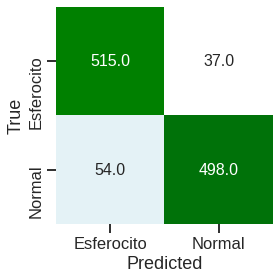

In [204]:
plotCM(y, model.predict(X2))

In [209]:
accuracy = (515+498)/(515+498+54+37)
print(f"Se obtiene una exactitud de {accuracy:.2f}")

Se obtiene una exactitud de 0.92


In [210]:
accuracy_score(y,model.predict(X2))

0.917572463768116

**¿Esta exactitud obtenida es un buen indicador del desempeño del modelo?**

....

In [253]:
X = df2[['MajorAxisLength','Area_cualitativa2','Mean_Green']]
X_train, X_test, y_train, y_test = train_test_split(X,df2['etiquetas'], test_size=0.35, random_state=123)

Procedemos a estandarizar los datos, pero esta vez, tenemos que tener en cuenta que se debe aplicar la misma transformación al conjunto de prueba `X_test`.

In [254]:
scaler = preprocessing.StandardScaler() #Definimos el objeto que estandarizara
scaler.fit(X_train) # ajustamos el scaler al training set

StandardScaler()

In [261]:
model = LogisticRegression() # Modelo
model.fit(scaler.transform(X_train), y_train) #Ajuste del modelo solo en training set

LogisticRegression()

In [262]:
y_pred = model.predict(scaler.transform(X_test))

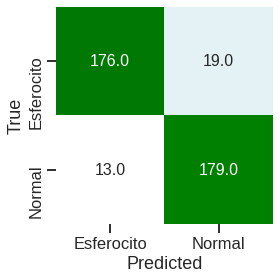

In [263]:
plotCM(y_test, y_pred)

In [264]:
accuracy_score(y_test,y_pred)

0.917312661498708

### ¿Y  con las tres clases?

La regresión logística se puede a extender a más clases, realizando múltiples clasificadores binarios o modificando la función de costo para aplicarlo a múltiples clases (multinomial).

In [274]:
model = LogisticRegression(multi_class='multinomial')
X = df[['MajorAxisLength','Area','Mean_Green']]
y = df['etiquetas']
model.fit(X,y)

y_pred = model.predict(X)

acc = accuracy_score(y,y_pred)

print(f"La exactitud de clasificación es {acc:.2f}")

La exactitud de clasificación es 0.83


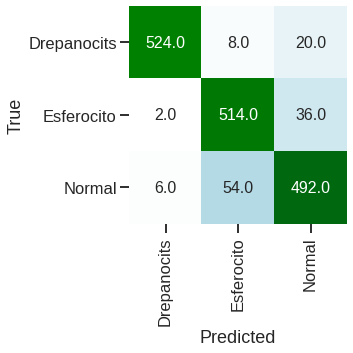

In [273]:
plotCM(y,y_pred)

# Ejercicio

¿Cómo podríamos mejorar la clasificación de los tres tipos de glóbulos rojos? 

Recuerda que hay que hacer una división training/test. Estandarizar las variables ayuda a mejorar y además, sólo hemos usado tres descriptores de los 28 que hay.

Inténtalo!